<a href="https://colab.research.google.com/github/maruthikelgire/Forage-certification-project/blob/main/Task_2_Forage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Delinquency_prediction_dataset_csv.csv')

# Display the first few rows of the dataframe
print("Original Data:")
print(df.head())

# Get information about the dataset
print("\nDataset Info:")
df.info()

Original Data:
  Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0    CUST0001   56  165580.0         398.0            0.390502   
1    CUST0002   69  100999.0         493.0            0.312444   
2    CUST0003   46  188416.0         500.0            0.359930   
3    CUST0004   32  101672.0         413.0            0.371400   
4    CUST0005   60   38524.0         487.0            0.234716   

   Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0                3                   0       16310.0              0.317396   
1                6                   1       17401.0              0.196093   
2                0                   0       13761.0              0.301655   
3                3                   0       88778.0              0.264794   
4                2                   0       13316.0              0.510583   

  Employment_Status  Account_Tenure Credit_Card_Type     Location Month_1  \
0               EMP              18       

In [ ]:
# Create the target variable 'Delinquent'
# A customer is delinquent if they have missed at least one payment in the past 6 months.
df['Delinquent'] = df[['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']].apply(lambda x: 1 if 'Missed' in x.values else 0, axis=1)

# Drop the original payment history columns and Customer_ID
df = df.drop(columns=['Customer_ID', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6'])

# Handle missing values
# For simplicity, we'll fill missing numerical values with the mean.
for col in ['Income', 'Credit_Score', 'Loan_Balance']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

# Separate features (X) and target (y)
X = df.drop('Delinquent', axis=1)
y = df['Delinquent']

# Display the cleaned data and the distribution of the target variable
print("Cleaned Data Head:")
print(X.head())
print("\nTarget Variable Distribution:")
print(y.value_counts())

Cleaned Data Head:
   Age    Income  Credit_Score  Credit_Utilization  Missed_Payments  \
0   56  165580.0         398.0            0.390502                3   
1   69  100999.0         493.0            0.312444                6   
2   46  188416.0         500.0            0.359930                0   
3   32  101672.0         413.0            0.371400                3   
4   60   38524.0         487.0            0.234716                2   

   Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio Employment_Status  \
0                   0       16310.0              0.317396               EMP   
1                   1       17401.0              0.196093     Self-employed   
2                   0       13761.0              0.301655     Self-employed   
3                   0       88778.0              0.264794        Unemployed   
4                   0       13316.0              0.510583     Self-employed   

   Account_Tenure Credit_Card_Type     Location  
0              18          St

In [ ]:
# Identify categorical and numerical features
categorical_features = ['Employment_Status', 'Credit_Card_Type', 'Location']
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (400, 12)
Testing data shape: (100, 12)


In [ ]:
# Create the logistic regression pipeline
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(random_state=42))])

# Train the model
log_reg_pipeline.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


Precision: 0.9200
Recall: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.92      1.00      0.96        92

    accuracy                           0.92       100
   macro avg       0.46      0.50      0.48       100
weighted avg       0.85      0.92      0.88       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion matrix plot saved as confusion_matrix.png


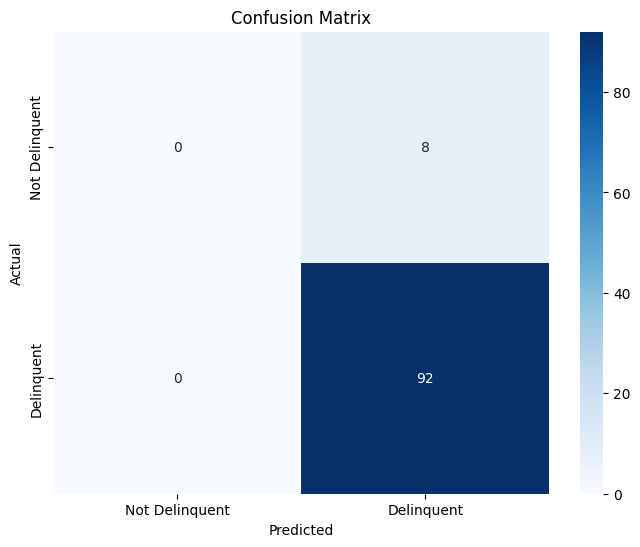

In [ ]:
# Make predictions on the test data
y_pred = log_reg_pipeline.predict(X_test)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Delinquent', 'Delinquent'], yticklabels=['Not Delinquent', 'Delinquent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

print("\nConfusion matrix plot saved as confusion_matrix.png")

In [ ]:
# Add predictions and actuals to the test set for bias analysis
X_test_with_results = X_test.copy()
X_test_with_results['Actual'] = y_test
X_test_with_results['Predicted'] = y_pred

# Analyze performance by Location
location_performance = X_test_with_results.groupby('Location').apply(lambda x: pd.Series({
    'precision': precision_score(x['Actual'], x['Predicted'], zero_division=0),
    'recall': recall_score(x['Actual'], x['Predicted'], zero_division=0),
    'count': len(x)
}))

print("Model Performance by Location:")
print(location_performance)

Model Performance by Location:
             precision  recall  count
Location                             
Chicago       0.920000     1.0   25.0
Houston       0.850000     1.0   20.0
Los Angeles   1.000000     1.0   24.0
New York      1.000000     1.0   12.0
Phoenix       0.842105     1.0   19.0


/tmp/ipython-input-4011191845.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  location_performance = X_test_with_results.groupby('Location').apply(lambda x: pd.Series({
